# Análise de Produtividade Agrícola com Dados da CONAB e SATVEG

Este notebook apresenta a análise estatística da produtividade agrícola da soja na Bahia, com base em dados históricos da CONAB e índices de vegetação (NDVI e EVI) da plataforma SATVEG.




In [6]:
import pandas as pd

# Importar os arquivos CSV
produtividade = pd.read_csv('produtividade_conab.csv')
ndvi_evi = pd.read_csv('NDVI_EVI.csv')

# Visualizar as primeiras linhas
display(produtividade.head())
display(ndvi_evi.head())

,Ano,Produtividade (kg/ha)
0,2000,2098
1,2001,1830
2,2002,1830
3,2003,2698
4,2004,2759


,Ano,NDVI_medio,EVI_medio
0,2000,0.43,0.22
1,2001,0.45,0.23
2,2002,0.47,0.24
3,2003,0.55,0.28
4,2004,0.56,0.29


## 2. Integração das Bases de Dados


In [7]:
# Unir os datasets pela coluna 'Ano'
df = pd.merge(produtividade, ndvi_evi, on='Ano')
df.head()

,Ano,Produtividade (kg/ha),NDVI_medio,EVI_medio
0,2000,2098,0.43,0.22
1,2001,1830,0.45,0.23
2,2002,1830,0.47,0.24
3,2003,2698,0.55,0.28
4,2004,2759,0.56,0.29


## 3. Análise Estatística: Correlação e Regressão Linear

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm

# Correlação de Pearson
corr_ndvi, _ = pearsonr(df['NDVI_medio'], df['Produtividade (kg/ha)'])
corr_evi, _ = pearsonr(df['EVI_medio'], df['Produtividade (kg/ha)'])
print(f'Correlação NDVI x Produtividade: {corr_ndvi:.2f}')
print(f'Correlação EVI x Produtividade: {corr_evi:.2f}')

# Regressão linear simples com NDVI
X = sm.add_constant(df['NDVI_medio'])
y = df['Produtividade (kg/ha)']
model = sm.OLS(y, X).fit()
print(model.summary())

Correlação NDVI x Produtividade: 0.99
Correlação EVI x Produtividade: 0.97
                              OLS Regression Results                             
Dep. Variable:     Produtividade (kg/ha)   R-squared:                       0.973
Model:                               OLS   Adj. R-squared:                  0.972
Method:                    Least Squares   F-statistic:                     793.5
Date:                   Mon, 26 May 2025   Prob (F-statistic):           9.38e-19
Time:                           02:07:56   Log-Likelihood:                -147.89
No. Observations:                     24   AIC:                             299.8
Df Residuals:                         22   BIC:                             302.1
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

## 4. Visualização dos Dados

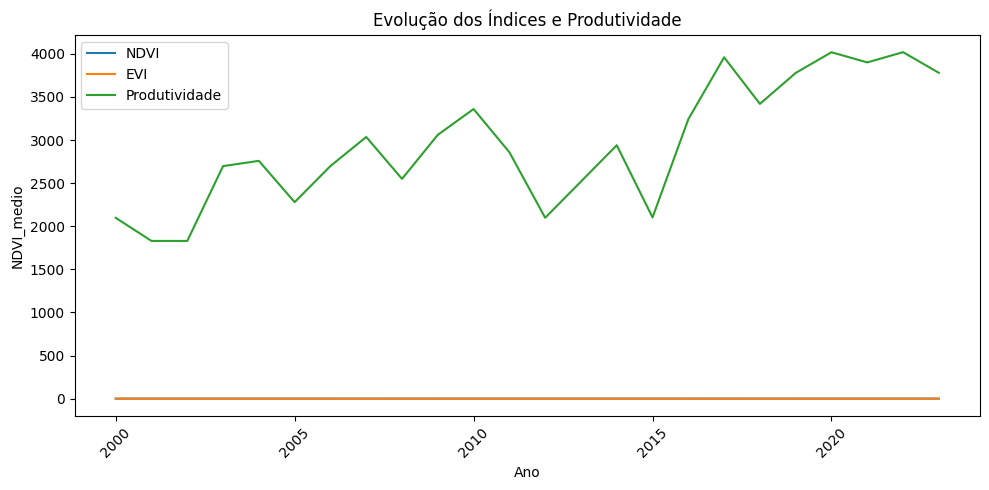

In [9]:
# Gráficos de linha
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Ano', y='NDVI_medio', label='NDVI')
sns.lineplot(data=df, x='Ano', y='EVI_medio', label='EVI')
sns.lineplot(data=df, x='Ano', y='Produtividade (kg/ha)', label='Produtividade')
plt.title('Evolução dos Índices e Produtividade')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

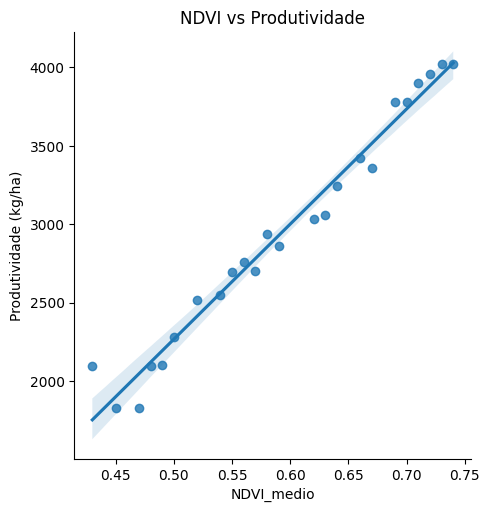

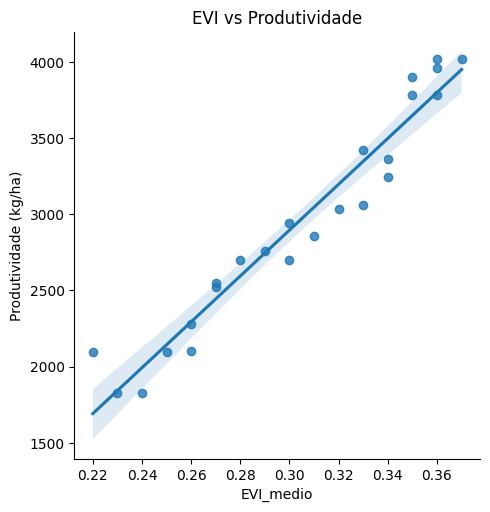

In [10]:
# Gráficos de dispersão com linha de regressão
sns.lmplot(data=df, x='NDVI_medio', y='Produtividade (kg/ha)')
plt.title('NDVI vs Produtividade')
plt.show()

sns.lmplot(data=df, x='EVI_medio', y='Produtividade (kg/ha)')
plt.title('EVI vs Produtividade')
plt.show()